# Project: Food Classification Convolutional Neural Network


In [19]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, Activation, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import os
from shutil import copyfile

# Split Train and Test Data
The Food101 dataset gives class names in the meta/meta/classes.txt. A train and test directory was created for each class name. The dataset also provides the filenames of pre-split train and test images. These images were copied to the corresponding directories.

In [20]:
classes = []

# create train and test directories for each class
with open('food41/meta/meta/classes.txt', 'r') as fp:
    line = fp.readline()
    while line:
        classes.append(line)
        line = line.strip()
        try:
            os.makedirs('train/'+line)
        except FileExistsError:
            # directory already exists
            pass
        try:
            os.makedirs('test/'+line)
        except FileExistsError:
            # directory already exists
            pass
        line = fp.readline()
print(1)
# move training images to corresponding folders
with open('food41/meta/meta/train.txt', 'r') as fp:
    line = fp.readline()
    while line:
        line = line.strip()
        dir = "train/" + line.split('/')[0]
        if os.path.isdir(dir):
            src = 'food41/images/' + line + '.jpg'
            dst = 'train/' + line + '.jpg'
            copyfile(src, dst)
            print(line)
        else:
            print("notfound",line)
        line = fp.readline()
print(2)

# move testing images to corresponding folders
with open('food41/meta/meta/test.txt', 'r') as fp:
    line = fp.readline()
    while line:
        line = line.strip()
        dir = "test/" + line.split('/')[0]
        if os.path.isdir(dir):
            src = 'food41/images/' + line + '.jpg'
            dst = 'test/' + line + '.jpg'
            copyfile(src, dst)
            print(line)
        else:
            print("notfound",line)
        line = fp.readline()
print(3)

1
apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856
apple_pie/1074942
apple_pie/1076891
apple_pie/1077610
apple_pie/1077964
apple_pie/1088809
apple_pie/1097378
apple_pie/1103795
apple_pie/1109597
apple_pie/1111062
apple_pie/1112300
apple_pie/1112838
apple_pie/1121884
apple_pie/112378
apple_pie/1133267
apple_pie/1142597
apple_pie/1147371
apple_pie/1154371
apple_pie/1158360
apple_pie/1159801
apple_pie/1165004
apple_pie/1166116
apple_pie/1166210
apple_pie/116697
apple_pie/1174241
apple_pie/1174949
apple_pie/1177254
apple_pie/118237
apple_pie/1184568
apple_pie/1185445
apple_pie/1185654
apple_pie/1191665
apple_pie/1196628
apple_pie/1199851
apple_pie/1200079
apple_pie/1214326
apple_pie/1215650
apple_pie/1218767
apple_pie/1220194
apple_pie/1230465
apple_pie/1232311
apple_pie/123782
apple_pie/1239205
apple_pie/1240585
apple_pie/1246460
apple_pie/1246552
apple_pie/12

apple_pie/3140647
apple_pie/3158095
apple_pie/3175105
apple_pie/3176186
apple_pie/3177727
apple_pie/3191226
apple_pie/3192077
apple_pie/3192774
apple_pie/3197173
apple_pie/3198655
apple_pie/3203950
apple_pie/3209538
apple_pie/3211704
apple_pie/321197
apple_pie/3214508
apple_pie/3217969
apple_pie/3226877
apple_pie/323108
apple_pie/3233920
apple_pie/3236737
apple_pie/3241750
apple_pie/3242445
apple_pie/3251989
apple_pie/3252424
apple_pie/3254296
apple_pie/3256198
apple_pie/3273568
apple_pie/3277458
apple_pie/3277765
apple_pie/3279836
apple_pie/3280622
apple_pie/3287607
apple_pie/3297976
apple_pie/330431
apple_pie/3307686
apple_pie/3313267
apple_pie/3318370
apple_pie/3324492
apple_pie/3333030
apple_pie/3335126
apple_pie/333800
apple_pie/3349423
apple_pie/3358059
apple_pie/3373840
apple_pie/3375088
apple_pie/3376635
apple_pie/3392444
apple_pie/339902
apple_pie/339921
apple_pie/3408912
apple_pie/3410227
apple_pie/3419799
apple_pie/3420738
apple_pie/3421349
apple_pie/3427584
apple_pie/342844

baby_back_ribs/1804706
baby_back_ribs/1804724
baby_back_ribs/1806940
baby_back_ribs/1807563
baby_back_ribs/1814986
baby_back_ribs/1819387
baby_back_ribs/1821315
baby_back_ribs/1829271
baby_back_ribs/1832939
baby_back_ribs/1838405
baby_back_ribs/1839467
baby_back_ribs/1840540
baby_back_ribs/1841024
baby_back_ribs/1845573
baby_back_ribs/184567
baby_back_ribs/1848417
baby_back_ribs/1858401
baby_back_ribs/1862790
baby_back_ribs/1875652
baby_back_ribs/1876802
baby_back_ribs/1878380
baby_back_ribs/1879515
baby_back_ribs/1880868
baby_back_ribs/1887058
baby_back_ribs/188943
baby_back_ribs/189367
baby_back_ribs/1895338
baby_back_ribs/189917
baby_back_ribs/1902615
baby_back_ribs/1907959
baby_back_ribs/1910700
baby_back_ribs/1917025
baby_back_ribs/1921931
baby_back_ribs/1928477
baby_back_ribs/1929872
baby_back_ribs/1931741
baby_back_ribs/1934757
baby_back_ribs/1934927
baby_back_ribs/1936442
baby_back_ribs/1941026
baby_back_ribs/1941557
baby_back_ribs/1943575
baby_back_ribs/1951972
baby_back_ribs/

baby_back_ribs/3715187
baby_back_ribs/3724591
baby_back_ribs/3730021
baby_back_ribs/3734297
baby_back_ribs/3735331
baby_back_ribs/37492
baby_back_ribs/3752732
baby_back_ribs/3761602
baby_back_ribs/3763815
baby_back_ribs/3774954
baby_back_ribs/3781340
baby_back_ribs/3783716
baby_back_ribs/3784453
baby_back_ribs/3785191
baby_back_ribs/3802610
baby_back_ribs/3805525
baby_back_ribs/3812902
baby_back_ribs/3821602
baby_back_ribs/382366
baby_back_ribs/3832369
baby_back_ribs/3837961
baby_back_ribs/3841100
baby_back_ribs/3849802
baby_back_ribs/389401
baby_back_ribs/3901488
baby_back_ribs/3914151
baby_back_ribs/400665
baby_back_ribs/405024
baby_back_ribs/41235
baby_back_ribs/42451
baby_back_ribs/436485
baby_back_ribs/443125
baby_back_ribs/443749
baby_back_ribs/444503
baby_back_ribs/450185
baby_back_ribs/464701
baby_back_ribs/464821
baby_back_ribs/466260
baby_back_ribs/479382
baby_back_ribs/481227
baby_back_ribs/482812
baby_back_ribs/488000
baby_back_ribs/489839
baby_back_ribs/502561
baby_back_ri

baklava/2409341
baklava/2410206
baklava/2411364
baklava/2418077
baklava/2420092
baklava/2425106
baklava/2426116
baklava/2426187
baklava/2427924
baklava/2428012
baklava/2428471
baklava/2431737
baklava/2435600
baklava/2437256
baklava/2442917
baklava/244805
baklava/2461257
baklava/2467153
baklava/2489340
baklava/2492935
baklava/2494926
baklava/2494933
baklava/2502082
baklava/2510073
baklava/2511737
baklava/2515971
baklava/2522061
baklava/2523553
baklava/2534447
baklava/2536605
baklava/2537313
baklava/2541140
baklava/2546142
baklava/2547813
baklava/25496
baklava/2555429
baklava/2564967
baklava/2567644
baklava/2572755
baklava/2575524
baklava/2581678
baklava/2581982
baklava/2583085
baklava/2585607
baklava/2588419
baklava/2592238
baklava/2613653
baklava/2622883
baklava/2623666
baklava/2626407
baklava/2630130
baklava/2630511
baklava/2635116
baklava/2654086
baklava/2659433
baklava/2662531
baklava/2662845
baklava/2663954
baklava/2667425
baklava/2667777
baklava/2674113
baklava/2685439
baklava/268

beef_carpaccio/1547238
beef_carpaccio/1558727
beef_carpaccio/1566003
beef_carpaccio/1568046
beef_carpaccio/1572827
beef_carpaccio/1573594
beef_carpaccio/1575775
beef_carpaccio/1576860
beef_carpaccio/1578151
beef_carpaccio/1584290
beef_carpaccio/1585692
beef_carpaccio/158620
beef_carpaccio/1589001
beef_carpaccio/1598719
beef_carpaccio/1608189
beef_carpaccio/1608390
beef_carpaccio/1612172
beef_carpaccio/1620553
beef_carpaccio/1626243
beef_carpaccio/1647730
beef_carpaccio/1648645
beef_carpaccio/165739
beef_carpaccio/1663789
beef_carpaccio/1672283
beef_carpaccio/1674540
beef_carpaccio/1675434
beef_carpaccio/1676250
beef_carpaccio/1677483
beef_carpaccio/1682054
beef_carpaccio/1682706
beef_carpaccio/168353
beef_carpaccio/1707308
beef_carpaccio/1707984
beef_carpaccio/1713850
beef_carpaccio/1715232
beef_carpaccio/1716987
beef_carpaccio/171785
beef_carpaccio/1725130
beef_carpaccio/1728686
beef_carpaccio/1738400
beef_carpaccio/1738745
beef_carpaccio/1742266
beef_carpaccio/1742687
beef_carpaccio/

beef_carpaccio/3192322
beef_carpaccio/3203268
beef_carpaccio/3211277
beef_carpaccio/3216048
beef_carpaccio/321665
beef_carpaccio/3217840
beef_carpaccio/3221427
beef_carpaccio/3224329
beef_carpaccio/3228191
beef_carpaccio/3234905
beef_carpaccio/3249786
beef_carpaccio/3252033
beef_carpaccio/3252686
beef_carpaccio/326667
beef_carpaccio/3272465
beef_carpaccio/3273459
beef_carpaccio/3287986
beef_carpaccio/329819
beef_carpaccio/3305412
beef_carpaccio/3307811
beef_carpaccio/3313711
beef_carpaccio/3323355
beef_carpaccio/3326056
beef_carpaccio/3326472
beef_carpaccio/3329208
beef_carpaccio/3335158
beef_carpaccio/3341601
beef_carpaccio/3344091
beef_carpaccio/3344113
beef_carpaccio/3348442
beef_carpaccio/3349619
beef_carpaccio/3357537
beef_carpaccio/3383588
beef_carpaccio/3391448
beef_carpaccio/3394009
beef_carpaccio/3400
beef_carpaccio/3410279
beef_carpaccio/3412113
beef_carpaccio/3421057
beef_carpaccio/3438338
beef_carpaccio/3438632
beef_carpaccio/3440204
beef_carpaccio/344157
beef_carpaccio/345

beef_tartare/1800122
beef_tartare/180013
beef_tartare/1812036
beef_tartare/1813420
beef_tartare/1814047
beef_tartare/1837012
beef_tartare/1844561
beef_tartare/1849129
beef_tartare/1851470
beef_tartare/1856402
beef_tartare/1857948
beef_tartare/1858283
beef_tartare/1872310
beef_tartare/1872770
beef_tartare/1874822
beef_tartare/188147
beef_tartare/1896347
beef_tartare/190469
beef_tartare/190471
beef_tartare/1907057
beef_tartare/192340
beef_tartare/1924517
beef_tartare/1931160
beef_tartare/1931893
beef_tartare/1933491
beef_tartare/1934307
beef_tartare/1934945
beef_tartare/1937232
beef_tartare/1937765
beef_tartare/1944176
beef_tartare/1944797
beef_tartare/1948628
beef_tartare/1951318
beef_tartare/1956029
beef_tartare/1956454
beef_tartare/1959584
beef_tartare/1969924
beef_tartare/1974191
beef_tartare/1974685
beef_tartare/1981578
beef_tartare/198603
beef_tartare/1991843
beef_tartare/1996927
beef_tartare/2010674
beef_tartare/2014033
beef_tartare/2018638
beef_tartare/2019488
beef_tartare/203097

beef_tartare/3644625
beef_tartare/3646367
beef_tartare/3650912
beef_tartare/3658737
beef_tartare/3663068
beef_tartare/3664215
beef_tartare/3665892
beef_tartare/3678012
beef_tartare/3680675
beef_tartare/3680819
beef_tartare/3681444
beef_tartare/3683890
beef_tartare/3685196
beef_tartare/3686131
beef_tartare/3690157
beef_tartare/3692683
beef_tartare/369778
beef_tartare/3700105
beef_tartare/3701576
beef_tartare/3702487
beef_tartare/3715939
beef_tartare/3722200
beef_tartare/3724655
beef_tartare/3726620
beef_tartare/3726713
beef_tartare/3729405
beef_tartare/3732949
beef_tartare/3736265
beef_tartare/3740314
beef_tartare/3745494
beef_tartare/3745532
beef_tartare/3759536
beef_tartare/3763300
beef_tartare/3767184
beef_tartare/3776249
beef_tartare/3780418
beef_tartare/3793016
beef_tartare/3794929
beef_tartare/380159
beef_tartare/3811348
beef_tartare/3811592
beef_tartare/3819483
beef_tartare/3820477
beef_tartare/3824340
beef_tartare/3828815
beef_tartare/3830650
beef_tartare/3834990
beef_tartare/38

beet_salad/2513425
beet_salad/2541182
beet_salad/2546141
beet_salad/2551321
beet_salad/2559634
beet_salad/256623
beet_salad/2568396
beet_salad/2569098
beet_salad/2571296
beet_salad/2572431
beet_salad/2583587
beet_salad/2583766
beet_salad/2592656
beet_salad/2592698
beet_salad/2595905
beet_salad/2601956
beet_salad/2609869
beet_salad/2612209
beet_salad/2624215
beet_salad/2628099
beet_salad/2646473
beet_salad/2654942
beet_salad/2655588
beet_salad/2658774
beet_salad/2659122
beet_salad/2662788
beet_salad/2674526
beet_salad/2680222
beet_salad/2680361
beet_salad/2683736
beet_salad/2683918
beet_salad/2685231
beet_salad/2685661
beet_salad/2688754
beet_salad/2696361
beet_salad/2696436
beet_salad/2696455
beet_salad/2705844
beet_salad/2707938
beet_salad/2710842
beet_salad/2718383
beet_salad/2719373
beet_salad/2726586
beet_salad/273691
beet_salad/2737527
beet_salad/2758483
beet_salad/2769513
beet_salad/2778205
beet_salad/2795499
beet_salad/2800635
beet_salad/2806433
beet_salad/2808614
beet_salad/281

beignets/1093875
beignets/1098287
beignets/1105707
beignets/1108942
beignets/1109051
beignets/1117472
beignets/1118856
beignets/1120044
beignets/1121044
beignets/112932
beignets/1132594
beignets/113375
beignets/1133765
beignets/1138841
beignets/114346
beignets/1149960
beignets/1151485
beignets/1158593
beignets/1162712
beignets/1166699
beignets/1170051
beignets/1171859
beignets/1172359
beignets/1175154
beignets/1178229
beignets/1182467
beignets/1199143
beignets/1199504
beignets/1200123
beignets/1203532
beignets/1205509
beignets/1223455
beignets/1223650
beignets/1223971
beignets/1227944
beignets/1239469
beignets/1240470
beignets/1240553
beignets/124761
beignets/1252785
beignets/1255775
beignets/1260507
beignets/1261083
beignets/1272118
beignets/1275052
beignets/1276384
beignets/1286851
beignets/1294037
beignets/1294951
beignets/1296128
beignets/1297009
beignets/130233
beignets/1310073
beignets/1319666
beignets/1319814
beignets/1320580
beignets/1332253
beignets/1333245
beignets/1335304
be

beignets/539874
beignets/541563
beignets/541711
beignets/54571
beignets/548515
beignets/558512
beignets/567861
beignets/56897
beignets/577345
beignets/588209
beignets/595743
beignets/599749
beignets/601412
beignets/602453
beignets/607285
beignets/607297
beignets/608261
beignets/609614
beignets/611548
beignets/615373
beignets/61751
beignets/621098
beignets/63319
beignets/634889
beignets/634933
beignets/634949
beignets/638107
beignets/63922
beignets/642027
beignets/64280
beignets/644870
beignets/645057
beignets/646871
beignets/647590
beignets/648179
beignets/648253
beignets/650707
beignets/652703
beignets/657280
beignets/657625
beignets/657739
beignets/659472
beignets/659585
beignets/662148
beignets/663907
beignets/666047
beignets/676507
beignets/698757
beignets/704599
beignets/706878
beignets/714119
beignets/717342
beignets/717604
beignets/72450
beignets/724810
beignets/72507
beignets/726875
beignets/727595
beignets/730726
beignets/733502
beignets/736858
beignets/738058
beignets/738468


bibimbap/2824550
bibimbap/2829633
bibimbap/2833018
bibimbap/2834189
bibimbap/2842968
bibimbap/2846033
bibimbap/2846972
bibimbap/2856855
bibimbap/2858555
bibimbap/2862279
bibimbap/286535
bibimbap/2873466
bibimbap/2886796
bibimbap/2889054
bibimbap/290054
bibimbap/2915290
bibimbap/29190
bibimbap/2937956
bibimbap/2940592
bibimbap/2956981
bibimbap/2961284
bibimbap/2966356
bibimbap/2966548
bibimbap/2967930
bibimbap/2979468
bibimbap/29795
bibimbap/2988372
bibimbap/2990856
bibimbap/2990859
bibimbap/2994086
bibimbap/3003579
bibimbap/3005097
bibimbap/3006919
bibimbap/3009829
bibimbap/3020494
bibimbap/3021609
bibimbap/3039265
bibimbap/3042746
bibimbap/3048507
bibimbap/3051510
bibimbap/3062963
bibimbap/3065192
bibimbap/3065207
bibimbap/3065208
bibimbap/306672
bibimbap/306734
bibimbap/3078201
bibimbap/30839
bibimbap/3087275
bibimbap/309488
bibimbap/3097110
bibimbap/3099354
bibimbap/3101952
bibimbap/3103100
bibimbap/3105799
bibimbap/3109798
bibimbap/3110576
bibimbap/3120194
bibimbap/3121644
bibimbap

bread_pudding/1596883
bread_pudding/1598327
bread_pudding/160073
bread_pudding/1606798
bread_pudding/1612046
bread_pudding/1613318
bread_pudding/1615800
bread_pudding/1617549
bread_pudding/1626404
bread_pudding/1629333
bread_pudding/1631893
bread_pudding/1633162
bread_pudding/1641217
bread_pudding/1647093
bread_pudding/1651212
bread_pudding/1652113
bread_pudding/1668451
bread_pudding/1670825
bread_pudding/1675837
bread_pudding/1676695
bread_pudding/1676820
bread_pudding/1679373
bread_pudding/1706167
bread_pudding/1709477
bread_pudding/1710422
bread_pudding/1715586
bread_pudding/1719659
bread_pudding/1719701
bread_pudding/1731853
bread_pudding/173250
bread_pudding/1735113
bread_pudding/1738135
bread_pudding/1745471
bread_pudding/1750448
bread_pudding/1761408
bread_pudding/1762820
bread_pudding/1774331
bread_pudding/177615
bread_pudding/1784468
bread_pudding/1789105
bread_pudding/1789852
bread_pudding/1790029
bread_pudding/1793754
bread_pudding/1794982
bread_pudding/1795287
bread_pudding

bread_pudding/3607191
bread_pudding/3609148
bread_pudding/3616747
bread_pudding/3624157
bread_pudding/362854
bread_pudding/3634612
bread_pudding/3635690
bread_pudding/3637836
bread_pudding/3642095
bread_pudding/364693
bread_pudding/3652801
bread_pudding/365410
bread_pudding/3660360
bread_pudding/3661319
bread_pudding/367035
bread_pudding/367201
bread_pudding/3679812
bread_pudding/3682330
bread_pudding/3691174
bread_pudding/369203
bread_pudding/3703513
bread_pudding/3704457
bread_pudding/3704529
bread_pudding/3707170
bread_pudding/3709470
bread_pudding/3710570
bread_pudding/3710680
bread_pudding/3716756
bread_pudding/372979
bread_pudding/3732223
bread_pudding/373978
bread_pudding/3752588
bread_pudding/3755003
bread_pudding/3762487
bread_pudding/376337
bread_pudding/3772264
bread_pudding/377986
bread_pudding/3781796
bread_pudding/3801938
bread_pudding/3802490
bread_pudding/3803049
bread_pudding/3803963
bread_pudding/3810847
bread_pudding/3819032
bread_pudding/382678
bread_pudding/3833828

breakfast_burrito/1763027
breakfast_burrito/176645
breakfast_burrito/176824
breakfast_burrito/17698
breakfast_burrito/1771684
breakfast_burrito/1779406
breakfast_burrito/1781412
breakfast_burrito/1784404
breakfast_burrito/17869
breakfast_burrito/1788615
breakfast_burrito/1792482
breakfast_burrito/1793525
breakfast_burrito/1797268
breakfast_burrito/1823752
breakfast_burrito/1832155
breakfast_burrito/1839614
breakfast_burrito/1840527
breakfast_burrito/1841646
breakfast_burrito/1844131
breakfast_burrito/1852378
breakfast_burrito/1860425
breakfast_burrito/1886280
breakfast_burrito/189490
breakfast_burrito/1906000
breakfast_burrito/1906883
breakfast_burrito/1912571
breakfast_burrito/1912617
breakfast_burrito/1912943
breakfast_burrito/1913346
breakfast_burrito/1927352
breakfast_burrito/1927859
breakfast_burrito/1928100
breakfast_burrito/193493
breakfast_burrito/1941881
breakfast_burrito/1943119
breakfast_burrito/194672
breakfast_burrito/1950120
breakfast_burrito/1953427
breakfast_burrito/195

breakfast_burrito/3828209
breakfast_burrito/3838356
breakfast_burrito/383923
breakfast_burrito/384206
breakfast_burrito/384606
breakfast_burrito/3849212
breakfast_burrito/3849219
breakfast_burrito/3851470
breakfast_burrito/3853011
breakfast_burrito/3854844
breakfast_burrito/3855280
breakfast_burrito/3861250
breakfast_burrito/3861521
breakfast_burrito/3863807
breakfast_burrito/3864604
breakfast_burrito/3866877
breakfast_burrito/3871634
breakfast_burrito/3874479
breakfast_burrito/3874955
breakfast_burrito/3878803
breakfast_burrito/3883861
breakfast_burrito/3885145
breakfast_burrito/3899943
breakfast_burrito/3904543
breakfast_burrito/3917387
breakfast_burrito/3919748
breakfast_burrito/3920082
breakfast_burrito/3920606
breakfast_burrito/3924041
breakfast_burrito/397884
breakfast_burrito/398005
breakfast_burrito/398222
breakfast_burrito/403742
breakfast_burrito/403782
breakfast_burrito/439805
breakfast_burrito/44119
breakfast_burrito/441983
breakfast_burrito/450044
breakfast_burrito/455987


apple_pie/3746599
apple_pie/3779150
apple_pie/3800561
apple_pie/3809728
apple_pie/3825794
apple_pie/3829004
apple_pie/3860485
apple_pie/38795
apple_pie/3915901
apple_pie/403084
apple_pie/406682
apple_pie/407267
apple_pie/416233
apple_pie/418685
apple_pie/438094
apple_pie/440497
apple_pie/451719
apple_pie/455977
apple_pie/466304
apple_pie/484947
apple_pie/486170
apple_pie/495046
apple_pie/507349
apple_pie/532019
apple_pie/532974
apple_pie/590327
apple_pie/646264
apple_pie/661475
apple_pie/668694
apple_pie/688983
apple_pie/693210
apple_pie/727825
apple_pie/801869
apple_pie/807000
apple_pie/812047
apple_pie/827575
apple_pie/829175
apple_pie/829830
apple_pie/829949
apple_pie/83981
apple_pie/861244
apple_pie/867502
apple_pie/879842
apple_pie/884504
apple_pie/885848
apple_pie/886793
apple_pie/904832
apple_pie/908367
apple_pie/963140
apple_pie/981895
apple_pie/984571
apple_pie/986844
apple_pie/99556
apple_pie/997950
baby_back_ribs/1005066
baby_back_ribs/1022479
baby_back_ribs/1058654
baby_bac

baklava/3498449
baklava/3517946
baklava/3528628
baklava/3556892
baklava/356890
baklava/3570121
baklava/3578527
baklava/3584585
baklava/3608369
baklava/3628916
baklava/3645013
baklava/3655808
baklava/3669911
baklava/3680783
baklava/3696940
baklava/3697640
baklava/370124
baklava/3734372
baklava/3745075
baklava/3753309
baklava/3765756
baklava/3768887
baklava/3769622
baklava/3780885
baklava/3782828
baklava/3785055
baklava/3797211
baklava/3801543
baklava/3885250
baklava/3889053
baklava/3893932
baklava/461467
baklava/473273
baklava/490206
baklava/50627
baklava/506922
baklava/521925
baklava/558342
baklava/563537
baklava/567973
baklava/613574
baklava/640052
baklava/6789
baklava/689207
baklava/694258
baklava/704086
baklava/721053
baklava/722179
baklava/72326
baklava/724383
baklava/734297
baklava/758596
baklava/763258
baklava/788
baklava/796010
baklava/800666
baklava/840044
baklava/862581
baklava/881362
baklava/890847
baklava/899196
baklava/910559
baklava/930650
baklava/940134
baklava/941312
bak

beef_tartare/2227084
beef_tartare/2231680
beef_tartare/2248323
beef_tartare/2264670
beef_tartare/2265986
beef_tartare/2289872
beef_tartare/2298846
beef_tartare/2306967
beef_tartare/2313622
beef_tartare/2355446
beef_tartare/2413744
beef_tartare/2422495
beef_tartare/2426755
beef_tartare/2430031
beef_tartare/2443022
beef_tartare/2457432
beef_tartare/2528528
beef_tartare/2561385
beef_tartare/2572875
beef_tartare/257870
beef_tartare/2580153
beef_tartare/2586871
beef_tartare/2597775
beef_tartare/2625114
beef_tartare/2628081
beef_tartare/2654675
beef_tartare/2656316
beef_tartare/2657205
beef_tartare/2679067
beef_tartare/2686467
beef_tartare/2731908
beef_tartare/2752297
beef_tartare/2772902
beef_tartare/2774675
beef_tartare/2781012
beef_tartare/2783511
beef_tartare/2817385
beef_tartare/2853815
beef_tartare/2865574
beef_tartare/2884746
beef_tartare/2920837
beef_tartare/2921620
beef_tartare/2923655
beef_tartare/2936728
beef_tartare/2937346
beef_tartare/2945623
beef_tartare/2956362
beef_tartare/2

beignets/1363942
beignets/1385293
beignets/1408844
beignets/1410990
beignets/1416495
beignets/1424753
beignets/1425688
beignets/1477348
beignets/1493882
beignets/151292
beignets/1518757
beignets/1530535
beignets/1530659
beignets/1532945
beignets/1545060
beignets/1554546
beignets/1573496
beignets/1595405
beignets/1595995
beignets/1619339
beignets/1648484
beignets/1654958
beignets/166007
beignets/1683790
beignets/1699850
beignets/1700779
beignets/1742034
beignets/1742248
beignets/1751352
beignets/1776761
beignets/1780417
beignets/1812420
beignets/1827892
beignets/1830896
beignets/1830956
beignets/1832643
beignets/1860268
beignets/1868425
beignets/1873457
beignets/1896919
beignets/1900295
beignets/1939298
beignets/1939575
beignets/1955724
beignets/1973137
beignets/198713
beignets/2030228
beignets/2050837
beignets/2060825
beignets/209932
beignets/2110504
beignets/2118031
beignets/2121303
beignets/2132176
beignets/2149914
beignets/2155254
beignets/217043
beignets/2189741
beignets/2192983
be

bread_pudding/1901894
bread_pudding/1910489
bread_pudding/1916541
bread_pudding/19259
bread_pudding/1989609
bread_pudding/1992640
bread_pudding/2015007
bread_pudding/2027739
bread_pudding/2057209
bread_pudding/2059490
bread_pudding/2063138
bread_pudding/2073747
bread_pudding/2095895
bread_pudding/2118042
bread_pudding/215046
bread_pudding/2211749
bread_pudding/2218930
bread_pudding/2237800
bread_pudding/2247578
bread_pudding/2269077
bread_pudding/2280724
bread_pudding/2284677
bread_pudding/2289864
bread_pudding/2371767
bread_pudding/2386543
bread_pudding/2416424
bread_pudding/2416748
bread_pudding/2421122
bread_pudding/2426875
bread_pudding/2443597
bread_pudding/2450567
bread_pudding/2452000
bread_pudding/2461816
bread_pudding/24672
bread_pudding/2471267
bread_pudding/2501219
bread_pudding/2516218
bread_pudding/255220
bread_pudding/256298
bread_pudding/2569393
bread_pudding/2592781
bread_pudding/2608229
bread_pudding/2628136
bread_pudding/2652551
bread_pudding/2673844
bread_pudding/267

breakfast_burrito/3733629
breakfast_burrito/3739310
breakfast_burrito/3750414
breakfast_burrito/3765250
breakfast_burrito/3812727
breakfast_burrito/3835487
breakfast_burrito/3883395
breakfast_burrito/403685
breakfast_burrito/439966
breakfast_burrito/45301
breakfast_burrito/46220
breakfast_burrito/470206
breakfast_burrito/476324
breakfast_burrito/478718
breakfast_burrito/491065
breakfast_burrito/508218
breakfast_burrito/508606
breakfast_burrito/517530
breakfast_burrito/520807
breakfast_burrito/526741
breakfast_burrito/53713
breakfast_burrito/537375
breakfast_burrito/544070
breakfast_burrito/548893
breakfast_burrito/553591
breakfast_burrito/566378
breakfast_burrito/568260
breakfast_burrito/57186
breakfast_burrito/572550
breakfast_burrito/583334
breakfast_burrito/588763
breakfast_burrito/600819
breakfast_burrito/616486
breakfast_burrito/626880
breakfast_burrito/640082
breakfast_burrito/644816
breakfast_burrito/659625
breakfast_burrito/670250
breakfast_burrito/67192
breakfast_burrito/67923

# Using Generators to Load Data
The ImageDataGenerator class was used to deal with the large amount of images in batches. This also enabled the use of data augmentation and multithreading.

In [21]:
# set size of images
nrow = 128
ncol = 128

#
train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

test_data_dir = './test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Display Image
The following function displays the inputted image.

In [22]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

# Sample Display Images
Images generated from train_generator and their corresponding label are shown.

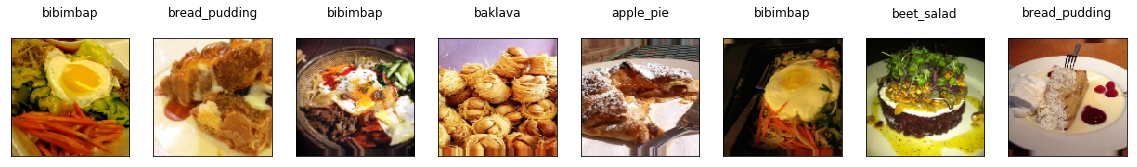

In [23]:
# sample minibatch
X,y = train_generator.next()
plt.figure(figsize=(20,20))
nplot = 8
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    disp_image(X[i])
    plt.title(classes[int(y[i])])

# Train Model
A new Sequential model was created. Conv2D was used for 2D convolution, MaxPool2D for pooling to down sample, and Dropout for regularization to reduce overfitting.

In [24]:
# build model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(np.max(y)+2))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 63, 63, 64)        18496     
__________

# Train Model
The model was compiled with an rmsprop optimizer, sparse_categorical_crossentropy loss function, and accuracy metrics. The model was fit for 5 epochs using fit_generator.

In [25]:
# train model
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size
nepochs = 5  # Number of epochs

# Call the fit_generator function
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

Epoch 1/5
170/235 [====================>.........] - ETA: 2:34 - loss: 2.2588 - acc: 0.2057

KeyboardInterrupt: 

# Plot Accuracy
The accuracy metrics were taken from the model history.

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['training accuracy','validation accuracy'])
plt.show()

# Sample Error Images
Some images that were misclassified from a generated minibatch are shown.

In [ ]:
test_generator.reset()
nplot = 8
nfound = 0
Xerr = []
ytrue = []
yhat = []
while (nfound < nplot):
    Xts, yts = test_generator.next()
    y_pred = model.predict_classes(X).ravel()
    I = np.where(y_pred != yts)[0]
    for i in I:
        Xerr.append(Xts[i])
        ytrue.append(yts[i])
        yhat.append(y_pred[i])
        nfound += 1
print(yhat)
plt.figure(figsize=(20,10))
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    disp_image(Xerr[i])
    plt.title("yhat = "+classes[int(yhat[i])])
    plt.xlabel("y = "+classes[int(ytrue[i])])